In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.1em; line-height: 140%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import dis
import scipy
import math
from IPython.display import display
from functools import partial
import ipywidgets as widgets
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)
%load_ext line_profiler
%load_ext cython

# Actividad práctica 

### Instrucciones generales
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- Plazo de entrega: **Jueves 8 de Agosto a las 23:59**
- El trabajo es individual

### Análisis de componentes principales (PCA)

Describa en sus palabras el procedimiento de PCA sobre una matriz de datos y conteste:
1. ¿Qué optimiza PCA en términos de la proyección que se busca?
1. ¿Qué relación tiene con el problema de valores/vectores propios?
1. ¿Cómo se puede reducir la dimensión de los datos con PCA?

#### Respuestas:
1. PCA es un método de reducción de variables sin reducir información. Se buscan las componentes principales, reduciendo la variables descriptivas de los datos, sin dejar de representar la misma información. Lo que este método intenta encontrar son los vectores más representativos de una cantidad de datos, y todos estos vectores representativos son ortogonales, quiere decir que son linealmente independientes unos de otros, así se representa toda la información con menor cantidad de variables.


2. Los vectores propios son vectores representativos de un espacio, estos pueden ser multiplicados por un escalar (no cambian dirección), de forma que solo puede aumentar o disminuir su magnitud. En escencia PCA aplica la misma teoría, lo que hace es encontrar componentes principales (equivalentes a valores propios) que al combinarse pueden representar los distintos campos (otras variables) de un conjunto de datos.


3. Utilizando PCA lo que se hace es buscar valores y vectores significativos de un conjunto de datos, y siempre son menos que la cantidad de dimensiones de la matriz que se quiere optimiza. De esta forma, se disminuye la cantidad de campos o variables que se necesitan para representar la misma información

Considere el siguiente set de datos de imágenes de dígitos manuscritos de 8x8 píxeles
1. Reste la media de los datos y calcule la matriz de covarianza
1. Encuentre los componentes principales usando `scipy.linalg`
    1. Ordene los componentes principales de mayor a menor importancia
    1. Haga un gráfico de varianza explicada en función de la cantidad de componentes principales considerados
        1. ¿Cuántos se requieren para que se explique un 90% de la varianza?
    1. Visualize como imagen de 8x8 los 10 componentes principales de mayor importancia 
1. Haga una proyección usando los dos componentes principales de mayor importancia
    1. Grafique el resultado en un `scatter-plot` usando **distinto color** para cada digito (`label`). Debe incluir leyenda
    1. ¿Qué digitos se pueden separar en el espacio proyectado?

(1797, 64)

<IPython.core.display.Javascript object>


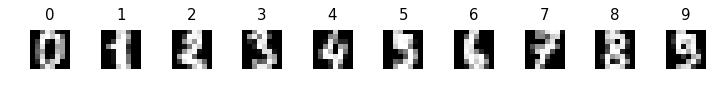

In [269]:
from sklearn.datasets import load_digits
digits = load_digits()
data_original = digits['data']
label = digits['target']
display(data_original.shape)

fig, ax = plt.subplots(1, 10, figsize=(8, 1), tight_layout=True)
for element, title, ax_ in zip(data_original[:10], label[:10], ax):
    ax_.matshow(np.reshape(element, (8, 8)), cmap=plt.cm.Greys_r)
    ax_.axis('off');
    ax_.set_title(title)

In [270]:
data = data_original
data_mean = np.mean(data, axis=0)
data = data - data_mean 
C = np.dot(data.T, data)/len(data)
L, W = scipy.linalg.eigh(C)

In [271]:
idx = np.argsort(L)[::-1] 
L = L[idx]
W = W[:, idx]
S=np.cumsum(100*L/np.sum(L))
x=np.argsort(L)[::-1]

<IPython.core.display.Javascript object>


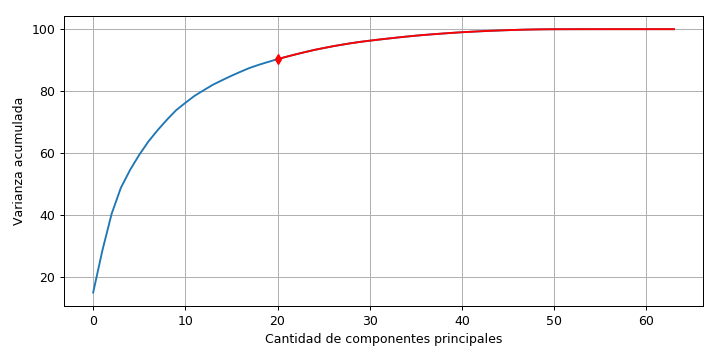

In [272]:
plt.figure(figsize=(8, 4), tight_layout=True)
plt.grid()
plt.plot(S)
plt.plot(x[20:], S[20:], color='r')
plt.plot(x[20], S[20],'rd', color='r')
plt.ylabel('Varianza acumulada');
plt.xlabel('Cantidad de componentes principales');

In [274]:
S[19],S[20]

(89.43031165985262, 90.31985012037211)

#### Respuesta:
Como podemos observar en el gráfico, y analizar los valores de $S$, para lograr un 90% de varianza se necesitan al menos 21 componentes principales para reprentar la información, ya que con $<21$ no se alcanza el valor de varianza deseado. valor número 20 de $S$ es: $89.43$ y el valor del número 21 de $S$ es: $90.31$.

<IPython.core.display.Javascript object>


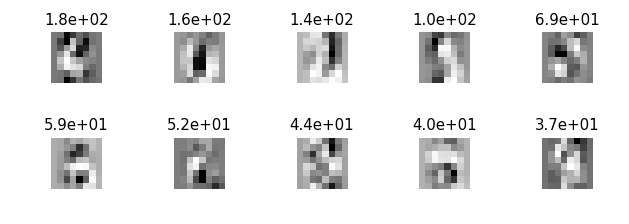

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(7,2.5), tight_layout=True)
for i, ax_ in enumerate(ax.ravel()):
    ax_.axis('off')
    ax_.set_title("{0:0.1e}".format(L[i]))
    ax_.imshow(W[:, i].reshape(8,8), cmap=plt.cm.Greys_r);

<IPython.core.display.Javascript object>


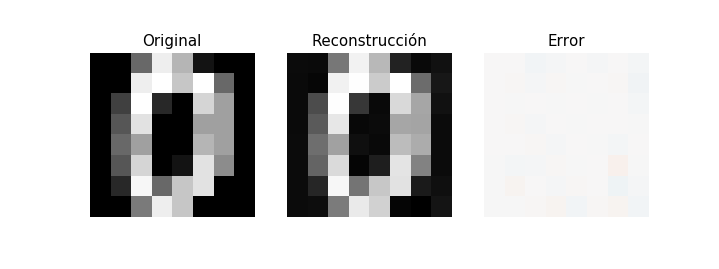

interactive(children=(SelectionSlider(continuous_update=False, description='k', layout=Layout(height='20px', w…

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].axis('off'); ax[1].axis('off'); ax[2].axis('off')
ax[0].set_title('Original')
ax[1].set_title('Reconstrucción')
ax[2].set_title('Error')

d = 0
ax[0].imshow(data_original[d, :].reshape(8, 8), cmap=plt.cm.Greys_r)
# Esto calcula los coeficientes de la imagen d
P = np.dot(data[d, :], W)
# Esto regenera la imagen cero a partir de sus coeficientes
# Xhat = data_mean + np.dot(W, P)
# np.allclose(data_original[d, :], Xhat[0, :], rtol=1e-3)

var_acum = 100*np.cumsum(L)/np.sum(L)
# ¿Cuantos coeficientes se necesitan para que X se parezca a Xhat?
def update_plot(k):
    Xhat = data_mean + np.dot(W[:, :k], P[:k])
    ax[1].imshow(Xhat.reshape(8, 8), cmap=plt.cm.Greys_r)
    ax[2].imshow(data_original[d, :].reshape(8, 8) - Xhat.reshape(8, 8), cmap=plt.cm.RdBu_r, vmin=-20, vmax=20)
    display("Porcentaje de varianza:", 100*np.sum(L[:k])/np.sum(L))
widgets.interact(update_plot, k=SelSlider_nice(options=[1, 5, 10, 20, 40, 60, 80, 100, 500, 1000]));

Considere las siguientes funciones para las siguientes actividades

In [222]:
# Generar un conjunto de datos de ND datos cada uno de largo NT con distribución log-normal
def generate_data(ND, NT):
    time = np.linspace(0, 1, num=NT)
    cov = 0.1*np.exp(-0.5*(time[:, None]  - time[:, None].T)**2/0.5**2)
    data = np.exp(np.random.multivariate_normal(mean=np.zeros(NT), cov=cov, size=ND))
    return time, data

# Ajustar un modelo polinomial de cuarto grado a los datos y calcular el mse
def slow_function(time, data):
    ND, NT = data.shape
    X = np.vstack([time**k for k in range(4)]).T
    Phi = np.linalg.pinv(X)
    mse = np.zeros(shape=(ND,))
    theta = np.zeros(shape=(ND, 4))
    for i, y in enumerate(data):
        y_log = np.log(y)
        y_mean = np.mean(y_log)
        y_var = np.var(y_log)
        y_norm = (y_log - y_mean)/np.sqrt(y_var)
        theta[i, :] = np.dot(Phi, y_norm)
        model = np.dot(X, theta[i, :])
        mse[i] = np.mean((y_norm - model)**2)
    return mse, theta  

### Midiendo tiempo total

1. Para 20 valores de ND distintos generados con `np.logspace(1, 5, num=20).astype(int)`
    1. Genere un conjunto de datos de tamaño ND y largo NT=1000 usando `generate_data`
    1. Mida y guarde el tiempo total promedio (10 repeticiones) que toma ajustar un modelo polinomial a los ND datos con `slow_function`
        > HINT: Puede usar el argumento `-o` de la magia timeit para guardar el resultado
1. Use matplotlib para generar un gráfico de (tiempo total promedio) con barras de error y otro de (tiempo total promedio)/ND
    1. Estudie ambos gráficos y discuta lo que observa. ¿Qué está ocurriendo en el segundo gráfico? ¿Qué relación tiene con el overhead?

In [223]:
# Usé valores más pequeños para que no tarde demasiado
N = 100
val = np.logspace(1, 5, num=10).astype(int)
mean = []
std = []
for x in val:
    time, data = generate_data(x, N)
    t = %timeit -r10 -n1 -o slow_function(time,data)
    mean.append(np.mean(t.all_runs))
    std.append(np.std(t.all_runs))

2.44 ms ± 98.2 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
5.72 ms ± 927 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
15.3 ms ± 2.22 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
29 ms ± 9.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
76.2 ms ± 19.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
163 ms ± 27.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
474 ms ± 42.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
1.23 s ± 105 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
3.54 s ± 330 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
9.47 s ± 447 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


<IPython.core.display.Javascript object>


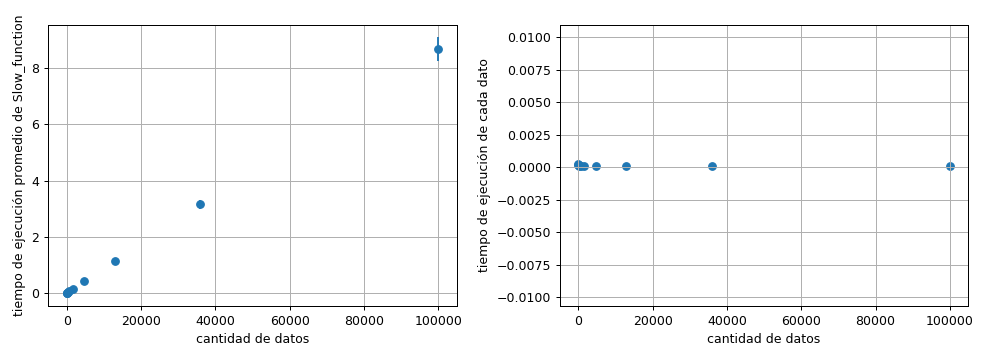

Text(0, 0.5, 'tiempo de ejecución de cada dato')

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4), tight_layout=True)
ax[0].grid()
ax[0].errorbar(val, mean, yerr=std, fmt='o')
ax[0].set_ylabel('tiempo de ejecución promedio de Slow_function')
ax[0].set_xlabel('cantidad de datos')

ax[1].grid()
ax[1].scatter(val, mean/val)
ax[1].set_xlabel("cantidad de datos")
ax[1].set_ylabel("tiempo de ejecución de cada dato")

#### Respuesta a la pregunta:
Al hacer un acercamiento en el segundo gráfico se da cuenta de que existe una ligera curva que desciende a medida que aumenta la cantidad de datos, esto solo ocurre en el principio del gráfico (hasta aproximadamente el punto 2000 del eje X), esto ocurre ya que existe overhead en la definición de estructras al principio de la ejecución de la función, y ocupa una mayor porción de tiempo cuando son menos datos, lo cual NO quiere decir que dure más, simplemente que es un proceso que se hace una vez, pero al ser más datos, proporcionalmente ocupa menos tiempo.

### Profiling 

Genere un conjunto de datos de tamaño 10000 y largo 1000

1. Haga un profiling con cProfile con la magia `%prun`
    1. Use los argumentos `-q -T texto` para escribir un archivo de texto con el resultado
    1. Imprima el resultado con funciones de `bash`
    1. ¿Cuáles son las 5 funciones con mayor tiempo total?
    1. ¿Cuáles son las 5 funciones con mayor tiempo acumulado?
1. Haga un profiling linea a linea con la magia `%lprun`
    1. Use el argumento `-T texto` para escribir un archivo de texto con el resultado
    1. Imprima el resultado con funciones de `bash`
    1. ¿Cuáles son las 5 lineas más costosas?


In [277]:
N=10000
M=1000

mask=partial(generate_data, N, M)

In [285]:
#5 MÉTODOS CON MAYOR TIEMPO TOTAL
%prun -l 5 -s tottime -q -T tiempo_total_prun.txt mask()

 
*** Profile printout saved to text file 'tiempo_total_prun.txt'. 


In [286]:
%%bash
cat tiempo_total_prun.txt

         119 function calls in 2.778 seconds

   Ordered by: internal time
   List reduced from 65 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.438    1.438    2.466    2.466 {method 'multivariate_normal' of 'mtrand.RandomState' objects}
        1    0.993    0.993    0.995    0.995 decomp_svd.py:16(svd)
        1    0.299    0.299    2.766    2.766 <ipython-input-222-05eeb35abb59>:2(generate_data)
        1    0.017    0.017    0.029    0.029 numeric.py:2508(within_tol)
        1    0.012    0.012    2.778    2.778 <string>:1(<module>)

In [287]:
#5 MÉTODOS CON MAYOR TIEMPO ACUMULADO
%prun -l 5 -s cumtime -q -T tiempo_acum_prun.txt mask()

 
*** Profile printout saved to text file 'tiempo_acum_prun.txt'. 


In [288]:
%%bash
cat tiempo_acum_prun.txt

         119 function calls in 2.886 seconds

   Ordered by: cumulative time
   List reduced from 65 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.886    2.886 {built-in method builtins.exec}
        1    0.011    0.011    2.886    2.886 <string>:1(<module>)
        1    0.304    0.304    2.875    2.875 <ipython-input-222-05eeb35abb59>:2(generate_data)
        1    1.427    1.427    2.569    2.569 {method 'multivariate_normal' of 'mtrand.RandomState' objects}
        1    1.107    1.107    1.109    1.109 decomp_svd.py:16(svd)

In [16]:
%lprun -f generate_data -T tiempo_lprun.txt mask()


*** Profile printout saved to text file 'tiempo_lprun.txt'. 


In [17]:
%%bash
cat tiempo_lprun.txt

Timer unit: 1e-06 s

Total time: 3.01642 s
File: <ipython-input-10-05eeb35abb59>
Function: generate_data at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def generate_data(ND, NT):
     3         1        667.0    667.0      0.0      time = np.linspace(0, 1, num=NT)
     4         1      37335.0  37335.0      1.2      cov = 0.1*np.exp(-0.5*(time[:, None]  - time[:, None].T)**2/0.5**2)
     5         1    2978413.0 2978413.0     98.7      data = np.exp(np.random.multivariate_normal(mean=np.zeros(NT), cov=cov, size=ND))
     6         1          4.0      4.0      0.0      return time, data

### Cythonizando

Escriba una función de Cython que retorne el mismo resultado que `slow_function`
1. Considere los resultados de su profiling para escribir versiones cythonizadas de las funciones de numpy que considere necesario
1. Importe el logaritmo y la raiz cuadrada de `math.h`
1. Use decoradores para levantar las verificaciones de Python
1. Use vistas para los arreglos de NumPy
1. Mida el tiempo total promedio (10 repeticiones) para conjuntos de datos de tamaño`N=np.logspace(1, 5, num=20).astype(int)` y largo 1000
1. Haga una gráfica de speed-up (tiempo cython/tiempo slow_function) en función de $N$
1. Estudie y discuta lo que observa

In [295]:
%%cython -a -l m

import cython
cimport numpy as npc
import numpy as np

ctypedef npc.float64_t TIPO_t
TIPO = np.float64

cdef extern from "math.h":
    TIPO_t sqrt(TIPO_t)
    TIPO_t log(TIPO_t)
    TIPO_t pow(TIPO_t, int)

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)

cdef slow_function_cython(TIPO_t [::1] time, TIPO_t [:, ::1] data):
    cdef int ND = data.shape[0]
    cdef int NT = data.shape[1]
    cdef Py_ssize_t i, j, k
    cdef TIPO_t [:, ::1] X = np.zeros(shape=(NT,4))
    for i in range(NT):
        for j in range(4):
            X[i][j] = pow(time[i], j)
    cdef TIPO_t [:, ::1] Phi = np.linalg.pinv(X)
    
    cdef TIPO_t [::1] mse = np.zeros(shape=(ND,))
    cdef TIPO_t [:, ::1] theta = np.zeros(shape=(ND, 4))
    cdef TIPO_t [::1] model = np.zeros(shape=(NT,))
    cdef TIPO_t [::1] y_log = np.zeros(shape=(NT,))
    cdef TIPO_t [::1] y_norm = np.zeros(shape=(NT,))    
    cdef TIPO_t y_mean = 0
    cdef TIPO_t y_var = 0
    
    for i in range(ND):
        for j in range(NT):
            y_log[j] = log(data[i][j])
            y_mean += y_log[j]/(NT)
            y_var += pow(y_log[j]-y_mean,2)
        y_var = y_var/NT
        for j in range(NT):
            y_norm[j] = (y_log[j]-y_mean)/sqrt(y_var)
            
        for j in range(4):
            for k in range(NT):
                theta[i][j] +=  Phi[j][k]*y_norm[k]
        
        for j in range(NT):
            for k in range(4):
                model[j] += X[j][k]*theta[i][k]
            
        for j in range(NT):
            mse[i] += pow(y_norm[j]-model[j], 2)/NT
        
    return mse, theta

In [243]:
%timeit -r1 -n1 slow_function(time, data)
%timeit -r1 -n1 slow_function_cython(time, data)

9.88 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
522 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### discusión:
La mejora de tiempo es muy considerable, sin embargo creo que podría optimizarse mucho más, pero no pude por falta de conocimiento de la libreria cython

### Paralelizando

Escriba una versión paralela de su código Cython usando `parallel for` de OpenMP
1. Levante el GIL donde corresponda
1. Use un número de hilos adecuado para su computador
1. Mida el tiempo total promedio (10 repeticiones) para conjuntos de datos de tamaño`N=np.logspace(1, 5, num=20).astype(int)` y largo 1000
1. Haga una gráfica de speed-up (tiempo cython paralelo/tiempo cython secuencial) en función de $N$
1. Estudie y discuta lo que observa 